# Filtered Back Projection

## 1. Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from os import path
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.lines import Line2D
from matplotlib import ticker
import uproot
from IPython.display import display, HTML, Image

from modules import physics, utils, analyse

## 2. Configure

In [12]:
matplotlib.rcParams['axes.unicode_minus'] = False
FONT_SIZE = 28

plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = FONT_SIZE

# Prevent math text from using a different font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'  # Roman (serif) font
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'  # Italic font
plt.rcParams['mathtext.bf'] = 'Times New Roman'  # Bold font
plt.rcParams['mathtext.sf'] = 'Times New Roman'  # Sans-serif font
plt.rcParams['mathtext.tt'] = 'Times New Roman'  # Monospace font


OUTPUT_DIR = "./output/"
DATA_PATH = "/data/pct/sim/cpt404"
DATA_PROTON_RANGE_DIR = "./data/proton_ranges/"
ENERGY = 200 #MeV

## 3. Gether data

In [3]:
# df_read = pd.read_parquet(path.join(DATA_PATH, 'e200MeV.parquet'), engine='pyarrow')

In [4]:
data = pd.read_csv("/data/pct/sim/cpt404/data_gen/e200MeV.csv", index_col=False)

## 4. Methodologies

In [10]:
image_url = "assests/images/mp9589-fig-0001-m.jpg"
display(Image(url=image_url, width=800))

$$E = mc^2$$

<Axes: ylabel='Frequency'>

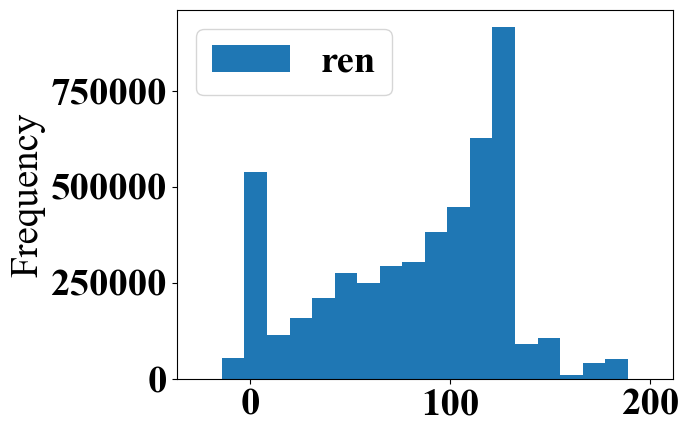